In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [0]:
class LogisticRegression():
    def __init__(self, data_x, data_y, learning_rate=0.01, num_iteration=100000, fit_intercept=True):
        self.learning_rate = learning_rate
        self.num_iteration = num_iteration
        self.X = data_x
        self.y = data_y
        self.theta = np.zeros(X.shape[1])
        self.gradients = np.zeros(X.shape[1])
        self.fit_intercept = fit_intercept
        
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def __loss_function(self, data_X, data_y):
        temp = 0
        for xi, yi in zip(data_X, data_y):
            p = self.__sigmoid(np.dot(self.theta.T, xi))
    
            temp += (yi * np.log(p)) + ((1 - yi) * np.log(1 - p))
        return temp

    def __loss(self, h, y):
        temp = 0
        for i in range(len(y)):
            if y[i] == 1:
                temp += -y[i] * np.log(h[i])
            elif y[i] == 0:
                temp += - (1 - y[i]) * np.log(1 - h[i])
        return temp / len(y)
    
    def __compute_gradient(self, data_xi, data_xij, data_yi):
        return (data_yi - self.__sigmoid(np.dot(self.theta.T, data_xi))) * data_xij
    
    def train(self):
        if self.fit_intercept:
            self.X = self.__add_intercept(self.X)
            self.theta = np.zeros(self.X.shape[1])
            self.gradients = np.zeros(self.X.shape[1])
        
        for i in range(self.num_iteration):
            for xi, yi in zip(self.X, self.y):
                for idx,xij in enumerate(xi):
                    self.gradients[idx] += self.__compute_gradient(xi, xij, yi)
                
            for j in range(self.X.shape[1]):
                self.theta[j] += self.learning_rate * self.gradients[j]
                self.gradients[j] = 0
             
            if(i % 1000 == 0):
                z = np.dot(self.X, self.theta)
                h = self.__sigmoid(z)
                loss = self.__loss(h, y)
                print(f'loss: {loss} \t')

    def predict_prob(self, X):
        if self.fit_intercept:
            self.X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(self.X, self.theta.T))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [0]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = (iris.target != 0) * 1

In [0]:
model = LogisticRegression(data_x=X, data_y=y, learning_rate=0.001, num_iteration=300000*2)

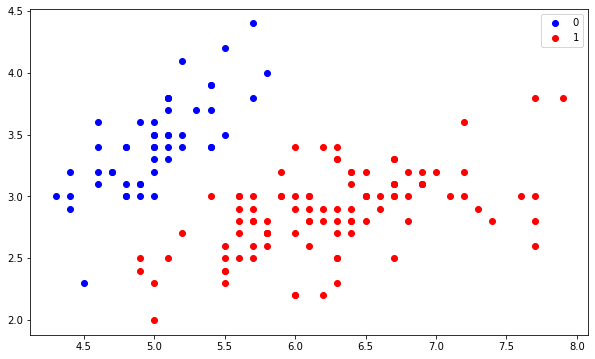

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [0]:
%time model.train()

loss: 0.6310481367990864 	
loss: 0.06871692783913153 	
loss: 0.050527290271679244 	
loss: 0.04351796536365344 	
loss: 0.03964874003676969 	
loss: 0.037122574519351255 	
loss: 0.03529948788058128 	
loss: 0.033892148762100206 	
loss: 0.03275180339408228 	
loss: 0.031793562310248526 	
loss: 0.03096541120807343 	
loss: 0.03023370014829455 	
loss: 0.029575705206175817 	
loss: 0.0289755374531403 	
loss: 0.028421762286151276 	
loss: 0.027905948349314494 	
loss: 0.02742174811170567 	
loss: 0.026964295813362144 	
loss: 0.02652980190698617 	
loss: 0.02611527305518404 	
loss: 0.02571831459262883 	
loss: 0.025336988480017246 	
loss: 0.024969709411523853 	
loss: 0.024615167664458062 	
loss: 0.024272271020201894 	
loss: 0.0239401005006428 	
loss: 0.023617876256319 	
loss: 0.023304931011758203 	
loss: 0.02300068920403579 	
loss: 0.022704650457563716 	
loss: 0.022416376395054866 	
loss: 0.022135480039253863 	
loss: 0.02186161724394225 	
loss: 0.021594479727078925 	
loss: 0.021333789378140646 	
loss: 0

In [0]:
model.theta

array([-39.9272432 ,  17.28918284, -17.03433075])

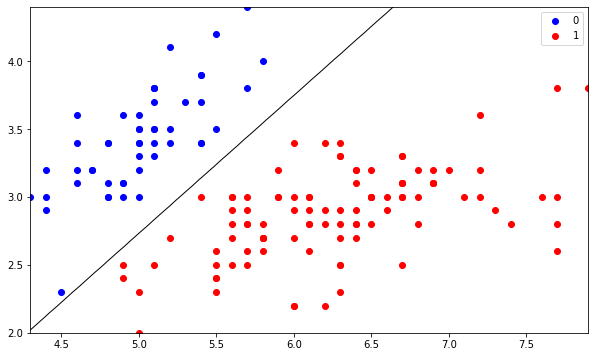

In [0]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');